In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

plt.rcParams.update({'font.family':'Candara', 'font.serif':['Candara']})
plt.rcParams.update({'pdf.fonttype': 'truetype', 'font.size': 18})
pd.set_option('display.max_rows',500)

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
train.shape,test.shape

((1460, 81), (1459, 80))

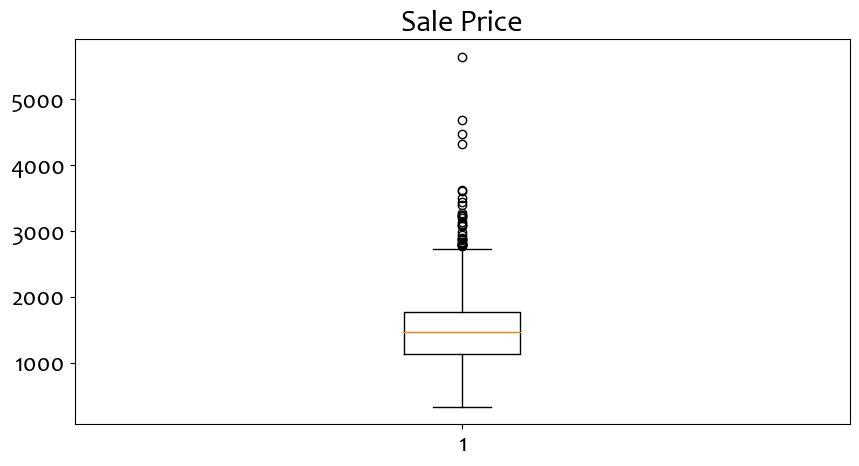

In [5]:
plt.figure(figsize=(10,5))
plt.boxplot(train['GrLivArea'])
plt.title('Sale Price')
plt.show()

In [6]:
train[['SalePrice','GrLivArea']].corr()

,SalePrice,GrLivArea
SalePrice,1.000000,0.708624
GrLivArea,0.708624,1.000000


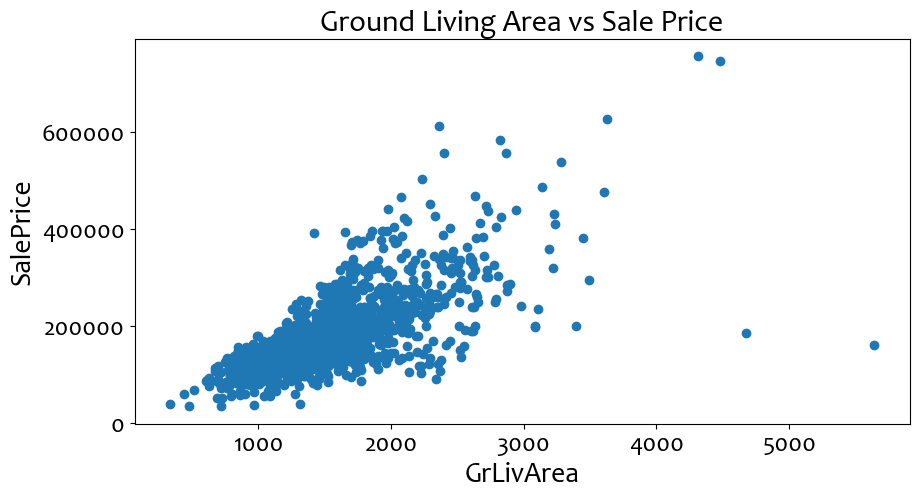

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(x = train['GrLivArea'], y=train['SalePrice'])
plt.title('Ground Living Area vs Sale Price')
plt.ylabel('SalePrice', fontsize=20)
plt.xlabel('GrLivArea', fontsize=20)
plt.show()

In [8]:
outlier_index = train[(train['SalePrice']<250000) & (train['GrLivArea']>4500)].index # drop Outliers - explain
train = train.drop(outlier_index)

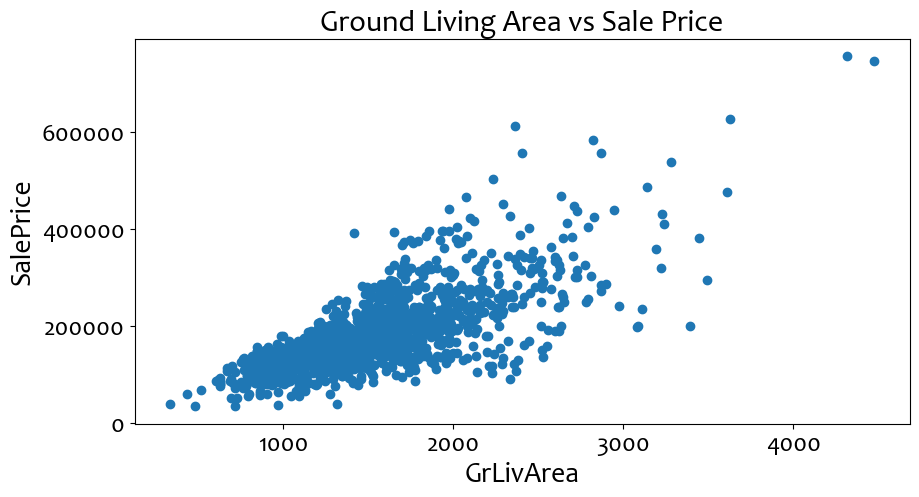

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.title('Ground Living Area vs Sale Price')
plt.ylabel('SalePrice', fontsize=20)
plt.xlabel('GrLivArea', fontsize=20)
plt.show()

In [10]:
y = train['SalePrice']

In [11]:
train_missing_data = train.isnull().mean() * 100 # check % of missing values
train_missing_data.sort_values(ascending=False)[:20]

PoolQC          99.588477
MiscFeature     96.296296
Alley           93.758573
Fence           80.727023
MasVnrType      59.807956
FireplaceQu     47.325103
LotFrontage     17.764060
GarageYrBlt      5.555556
GarageCond       5.555556
GarageType       5.555556
GarageFinish     5.555556
GarageQual       5.555556
BsmtFinType2     2.606310
BsmtExposure     2.606310
BsmtQual         2.537723
BsmtCond         2.537723
BsmtFinType1     2.537723
MasVnrArea       0.548697
Electrical       0.068587
Id               0.000000
dtype: float64

In [12]:
#Proceed to impute the values 1by1 - after checking value counts - justify each column decision

train['PoolQC'].fillna('None',inplace=True)
train['MiscFeature'].fillna('None',inplace=True)
train['Alley'].fillna('None',inplace=True)
train['Fence'].fillna('None',inplace=True)
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0], inplace=True)
train['FireplaceQu'].fillna('None',inplace=True)

train['LotFrontage'] = train['LotFrontage'].fillna(train.groupby('Neighborhood')['LotFrontage'].transform('median'))

train['GarageYrBlt'].fillna(0, inplace=True)
train['GarageCond'].fillna('None',inplace=True)
train['GarageType'].fillna('None',inplace=True)
train['GarageFinish'].fillna('None',inplace=True)
train['GarageQual'].fillna('None',inplace=True)

train['BsmtFinType2'].fillna('None',inplace=True)
train['BsmtExposure'].fillna('None',inplace=True)
train['BsmtQual'].fillna('None',inplace=True)
train['BsmtCond'].fillna('None',inplace=True)
train['BsmtFinType1'].fillna('None',inplace=True)

train['MasVnrArea'].fillna(train['MasVnrArea'].median(), inplace=True)
train['Electrical'].fillna(train['MasVnrType'].mode()[0],inplace=True)

In [13]:
test_missing_data = test.isnull().mean() * 100 # check % of missing values
test_missing_data.sort_values(ascending=False)[:35]

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
MasVnrType      61.274846
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageCond       5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrArea       1.028101
MSZoning         0.274160
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
BsmtFullBath     0.137080
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
TotalBsmtSF      0.068540
Exterior2nd      0.068540
GarageCars       0.068540
Exterior1st      0.068540
GarageArea       0.068540
SaleType         0.068540
MiscVal          0.000000
BedroomAbvGr     0.000000
dtype: float64

In [14]:
test['PoolQC'].fillna('None',inplace=True)
test['MiscFeature'].fillna('None',inplace=True)
test['Alley'].fillna('None',inplace=True)
test['Fence'].fillna('None',inplace=True)
test['MasVnrType'].fillna(test['MasVnrType'].mode()[0], inplace=True)
test['FireplaceQu'].fillna('None',inplace=True)

test['LotFrontage'] = test['LotFrontage'].fillna(test.groupby('Neighborhood')['LotFrontage'].transform('median'))

test['GarageYrBlt'].fillna(0, inplace=True)
test['GarageCond'].fillna('None',inplace=True)
test['GarageType'].fillna('None',inplace=True)
test['GarageFinish'].fillna('None',inplace=True)
test['GarageQual'].fillna('None',inplace=True)

test['BsmtFinType2'].fillna('None',inplace=True)
test['BsmtExposure'].fillna('None',inplace=True)
test['BsmtQual'].fillna('None',inplace=True)
test['BsmtCond'].fillna('None',inplace=True)
test['BsmtFinType1'].fillna('None',inplace=True)

test['MasVnrArea'].fillna(test['MasVnrArea'].median(), inplace=True)
test['MSZoning'].fillna(test['MSZoning'].mode()[0], inplace=True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0], inplace=True)
test['Utilities'].fillna(test['Utilities'].mode()[0], inplace=True)
test['Functional'].fillna(test['Functional'].mode()[0], inplace=True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0], inplace=True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median(), inplace=True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].median(), inplace=True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median(), inplace=True)
test['KitchenQual'].fillna(test['KitchenQual'].mode()[0], inplace=True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median(), inplace=True)
test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0], inplace=True)
test['GarageCars'].fillna(test['GarageCars'].mode()[0], inplace=True)
test['Exterior1st'].fillna(test['Exterior1st'].mode()[0], inplace=True)
test['GarageArea'].fillna(test['GarageArea'].median(), inplace=True)
test['SaleType'].fillna(test['SaleType'].mode()[0], inplace=True)

In [15]:
data = pd.concat([train,test],axis=0)
data.shape

(2917, 81)

In [16]:
data['AgeOfHouse'] = 2023 - data['YearBuilt']
data['AgeRemod'] = 2023 - data['YearRemodAdd']
data['TotalSqFt'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']

In [17]:
data['MSSubClass'] = data['MSSubClass'].astype(str)

In [18]:
data.drop(['Id','YearBuilt','YearRemodAdd','SalePrice'],axis=1,inplace=True)

In [19]:
num_cols = data.dtypes[data.dtypes != "object"].index

In [20]:
data = pd.get_dummies(data,drop_first=True,dtype='uint8')
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706.0,0.0,150.0,856.0,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,978.0,0.0,284.0,1262.0,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,162.0,486.0,0.0,434.0,920.0,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,0.0,216.0,0.0,540.0,756.0,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,655.0,0.0,490.0,1145.0,1145,...,0,0,0,0,1,0,0,0,1,0


In [21]:
train = data.iloc[:len(train)]
train.shape

(1458, 273)

In [22]:
test = data.iloc[len(train):]
test.shape

(1459, 273)

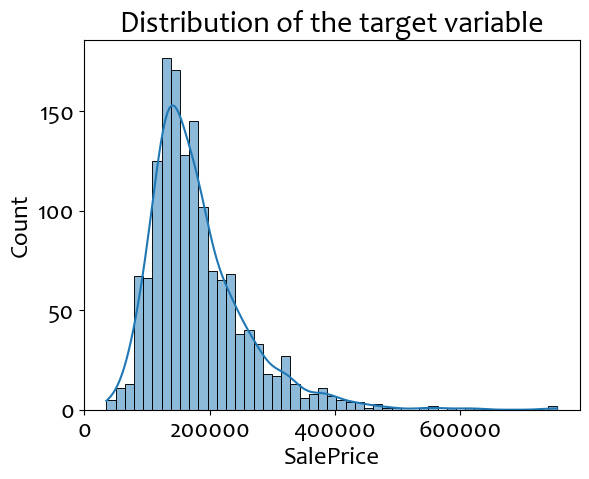

In [23]:
sns.histplot(y,kde=True)
plt.title('Distribution of the target variable')
plt.show()

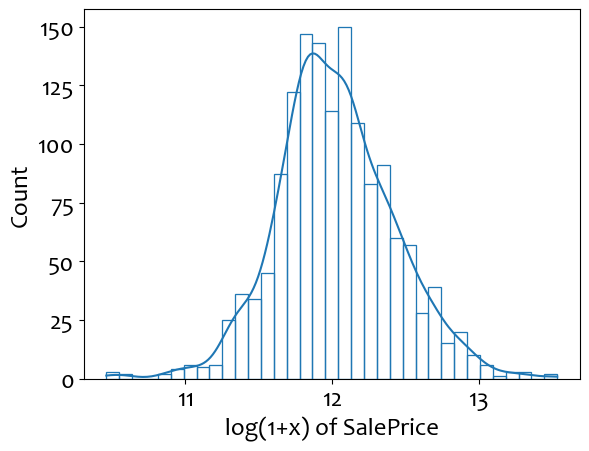

In [24]:
sns.histplot(np.log1p(y),kde=True,fill=False)
plt.xlabel('log(1+x) of SalePrice')
plt.show()

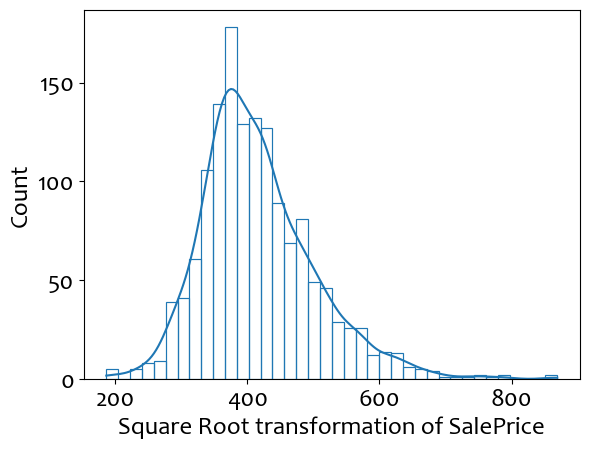

In [25]:
sns.histplot(np.sqrt(y),kde=True,fill=False)
plt.xlabel('Square Root transformation of SalePrice')
plt.show()

In [26]:
y= np.log1p(y)

In [27]:
def get_skewness(df):
    skewed_cols = df[num_cols].apply(lambda x : skew(x)).sort_values(ascending=False)
    skewness = pd.DataFrame({'skew' : skewed_cols})
    skewness = skewness[abs(skewness['skew'])>0.75]
    return skewness

In [28]:
train_skewness = get_skewness(train)
train_skewness

,skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895
EnclosedPorch,3.083987


In [29]:
skewed_cols = train_skewness.index
train[skewed_cols] = np.log1p(train[skewed_cols])

C:\Users\HN464GK\AppData\Local\Temp\ipykernel_36500\1180761908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[skewed_cols] = np.log1p(train[skewed_cols])


In [30]:
test_skewness = get_skewness(test)
test_skewness

,skew
PoolArea,20.176117
MiscVal,20.054543
LowQualFinSF,16.150628
3SsnPorch,12.511336
EnclosedPorch,4.664371
KitchenAbvGr,4.074860
BsmtFinSF2,4.038796
ScreenPorch,3.784349
BsmtHalfBath,3.779085
LotArea,3.112013


In [31]:
skewed_cols = test_skewness.index
test[skewed_cols] = np.log1p(test[skewed_cols])

C:\Users\HN464GK\AppData\Local\Temp\ipykernel_36500\2049217432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[skewed_cols] = np.log1p(test[skewed_cols])


In [32]:
X = train.copy()
X.shape,y.shape

((1458, 273), (1458,))

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model_0 = LinearRegression()
model_0.fit(X,y)

LinearRegression()

In [35]:
sample_submission_df = pd.read_csv('data/sample_submission.csv')
sample_submission_df['SalePrice'] = np.expm1(model_0.predict(test))
sample_submission_df.to_csv('data/submission0.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,246575.593650
1,1462,333691.565818
2,1463,363289.508498
3,1464,400995.844201
4,1465,276872.730129


In [48]:
train['SalePrice'] = y
highly_corr_cols = train.corr()['SalePrice'].sort_values(ascending=False).head(11).index.tolist()
highly_corr_cols

C:\Users\HN464GK\AppData\Local\Temp\ipykernel_36500\312190142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SalePrice'] = y


['SalePrice',
 'OverallQual',
 'TotalSqFt',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'Foundation_PConc']

In [41]:
highly_corr_cols.remove('SalePrice')

In [43]:
X = train[highly_corr_cols]

In [44]:
model_1 = LinearRegression()
model_1.fit(X,y)

LinearRegression()

In [47]:
sample_submission_df = pd.read_csv('data/sample_submission.csv')
sample_submission_df['SalePrice'] = np.expm1(model_1.predict(test[highly_corr_cols]))
sample_submission_df.to_csv('data/submission1.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,114439.646245
1,1462,147954.647736
2,1463,155720.736350
3,1464,171789.314516
4,1465,210636.684121
